## Pytorch Practice

### 1. Regression

In [1]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt

#### 1.1建構資料

In [2]:
# torch只會處理二維數據
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
y = x.pow(2) + 0.2 * torch.rand(x.size())

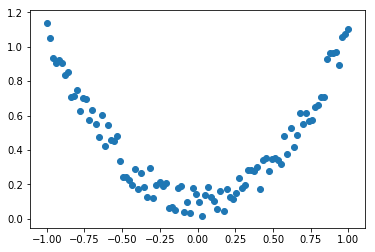

In [12]:
plt.scatter(x.numpy(), y.data.numpy())

In [13]:
# x, y = Variable(x), Variable(y)

#### 1.2定義網路

In [57]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        # 定義網路架構
        super(Net, self).__init__() #初始化父類別
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.predict = torch.nn.Linear(n_hidden, n_output )
    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.predict(x) # in regression problem, we dont need activation function at output layer
        return x

In [58]:
net = Net(n_feature=1, n_hidden=10, n_output=1)

In [59]:
print(net)

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


#### 1.3優化神經網路

In [60]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.5)
loss_func = torch.nn.MSELoss()

#### 1.4開始訓練

False
True


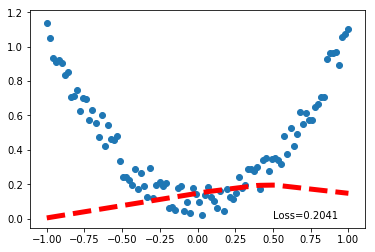

False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True


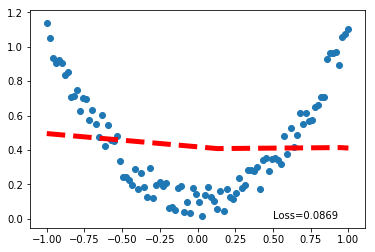

False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True


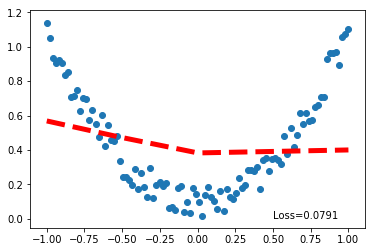

False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True


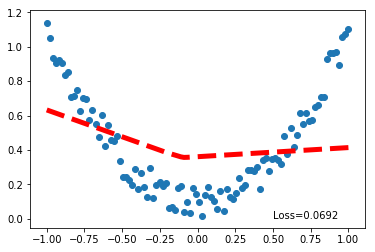

False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True


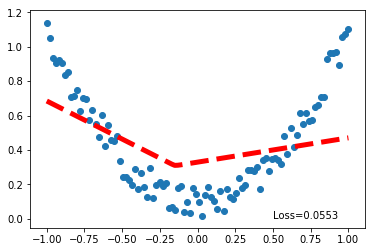

False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True


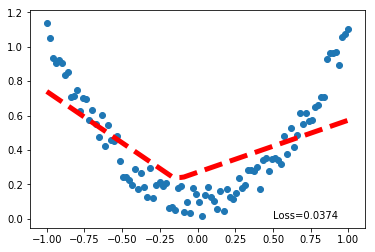

False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True


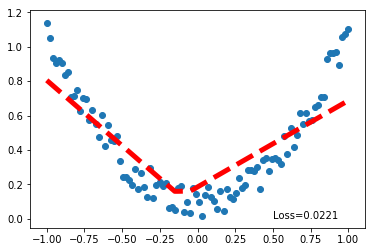

False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True


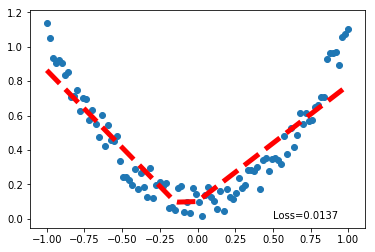

False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True


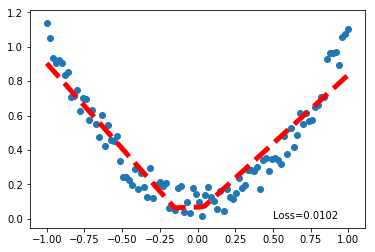

False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True


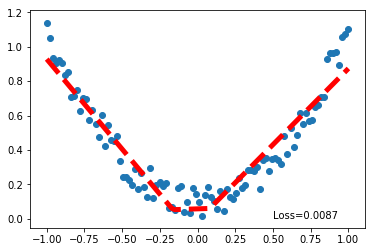

False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True


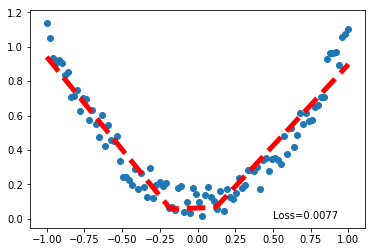

False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True


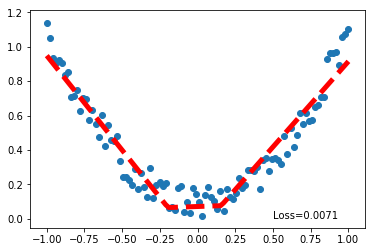

False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True


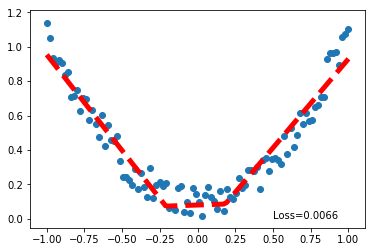

False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True


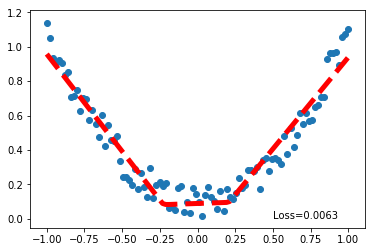

False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True


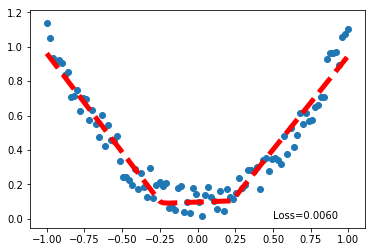

False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True


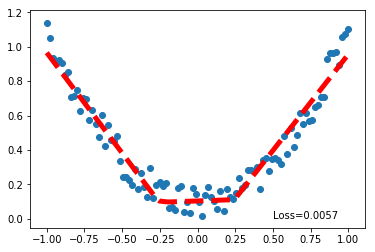

False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True


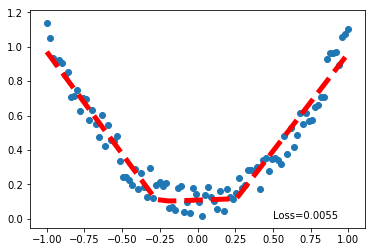

False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True


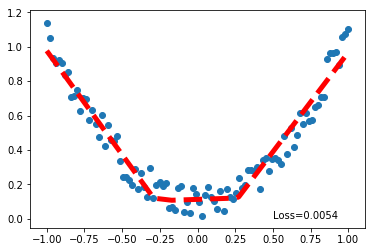

False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True


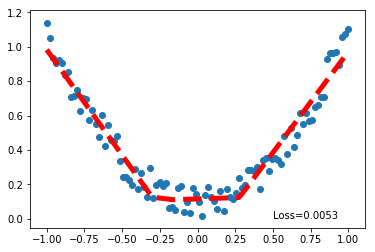

False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True


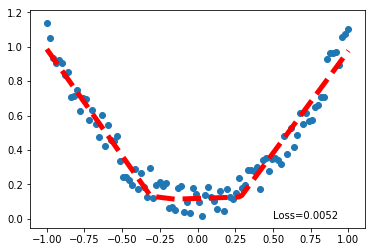

False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True


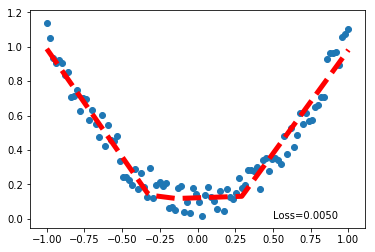

False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True


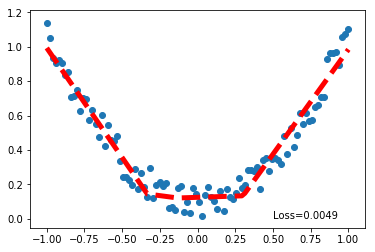

False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True


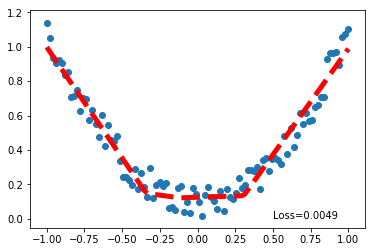

False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True


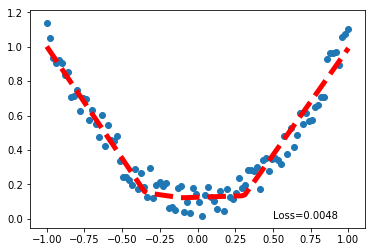

False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True


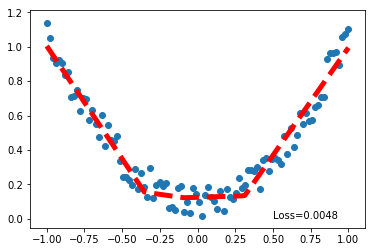

False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True


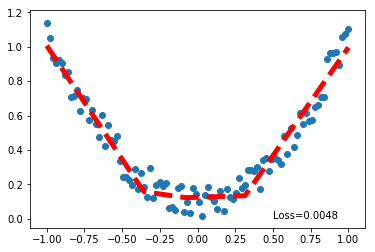

False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True


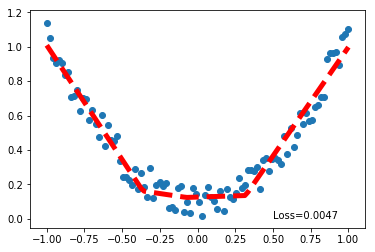

False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True


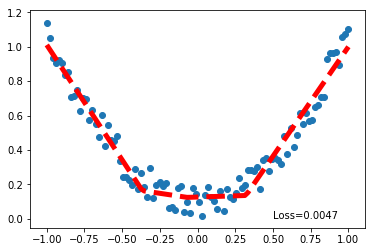

False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True


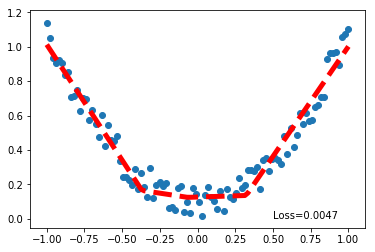

False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True


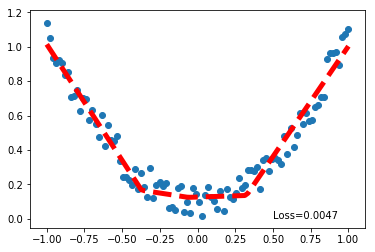

False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True


In [61]:
for t in range(300):
    pred = net(x)
    # order must (pred, ground_truth)
    loss = loss_func(pred, y)

    # 每次更新後gradient都會保留下來,所以要重置gradient = 0
    optimizer.zero_grad()
    
    # 計算各節點的梯度
    loss.backward()
    
    # 利用gradient descent
    optimizer.step()
    
    if t % 10 == 0:
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), pred.data.numpy(), 'r--', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy())
        plt.pause(0.1)

### 2. Classification

In [60]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt

#### 2.1建構資料

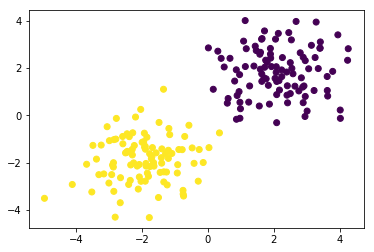

In [61]:
n_data = torch.ones(100, 2)
x0 = torch.normal(2*n_data, 1)
y0 = torch.zeros(100)
x1 = torch.normal(-2*n_data, 1)
y1 = torch.ones(100)
x = torch.cat((x0, x1)).type(torch.FloatTensor)
y = torch.cat((y0, y1)).type(torch.LongTensor)

plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy())

#### 2.2建搆模型

In [67]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.pred = torch.nn.Linear(n_hidden, n_output)
    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.pred(x)
        return x
net = Net(2, 10, 2)
print(net)

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (pred): Linear(in_features=10, out_features=2, bias=True)
)


In [68]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
loss_func = torch.nn.CrossEntropyLoss()

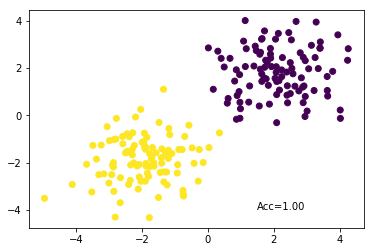

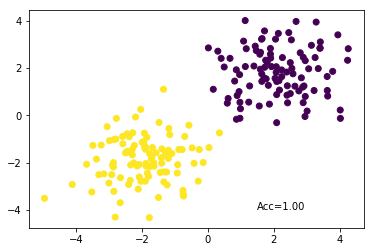

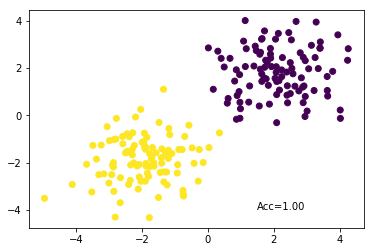

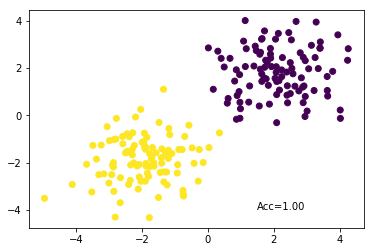

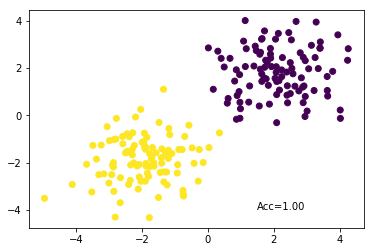

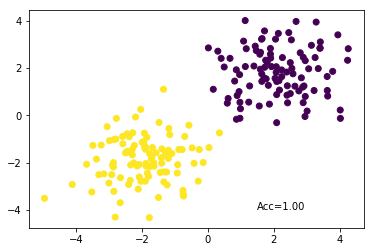

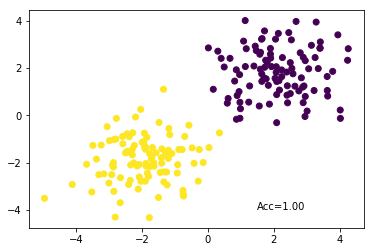

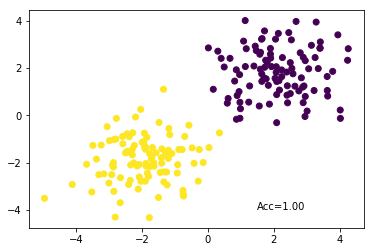

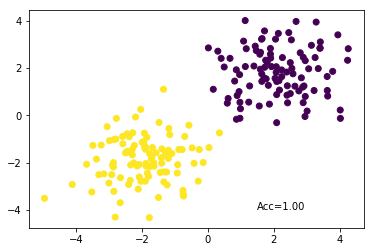

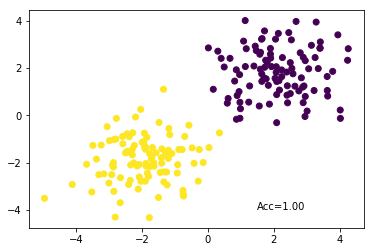

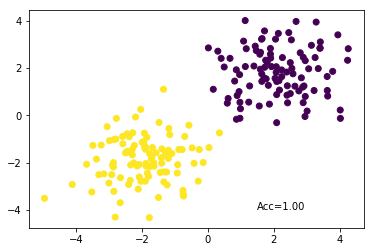

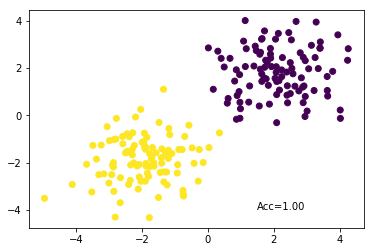

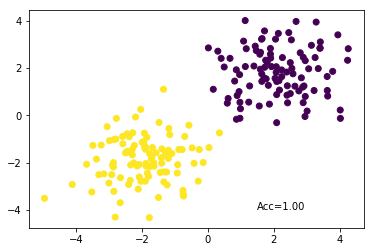

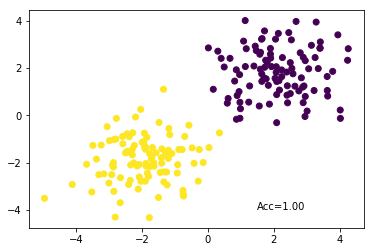

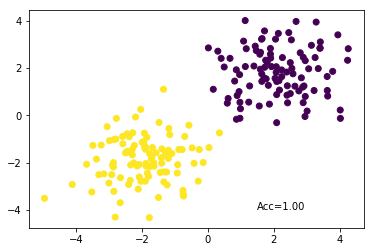

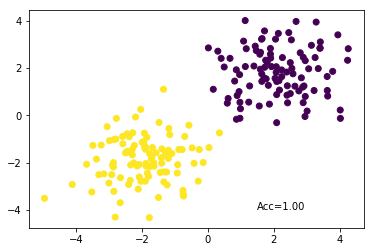

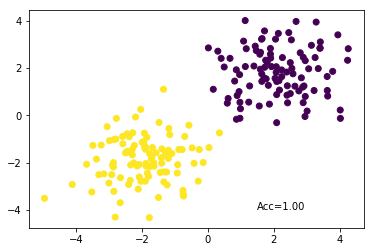

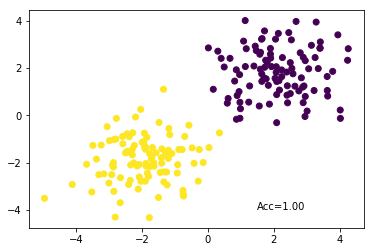

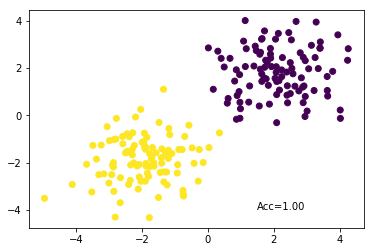

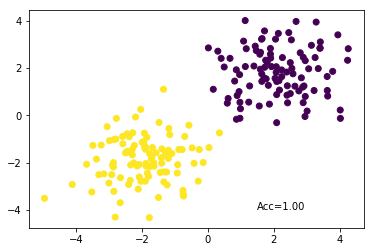

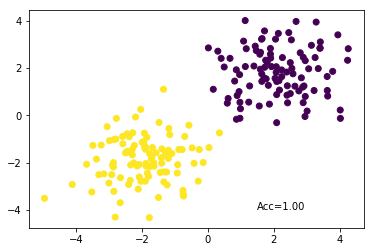

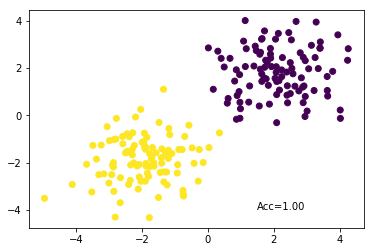

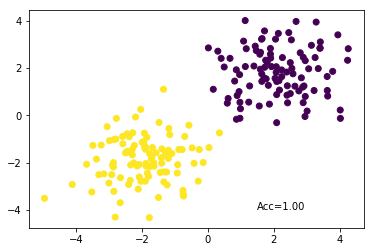

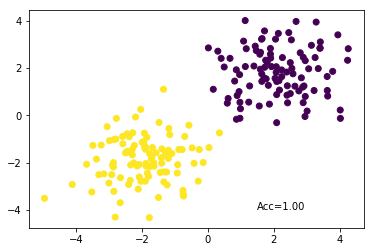

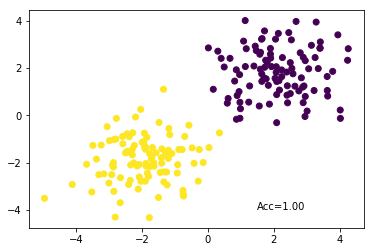

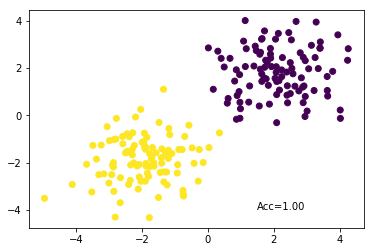

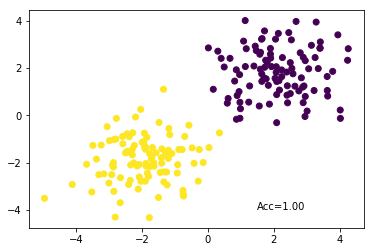

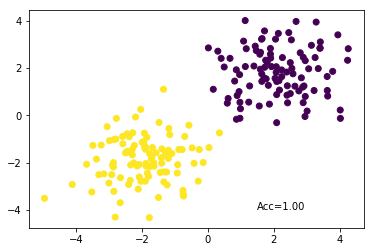

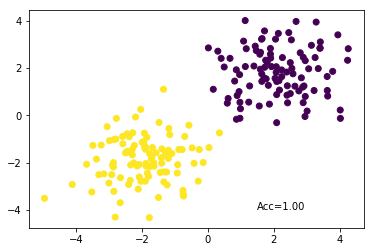

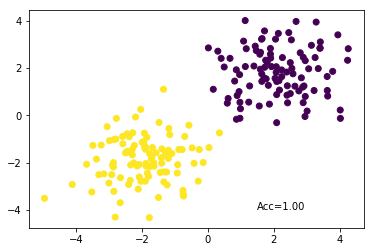

In [69]:
for t in range(30):
    out = net(x)
    loss = loss_func(out, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if t % 1 == 0:
        plt.cla()
        # 將預測結果轉為機率
        # F.softmax(out, dim=1), dim=1代表每列為一筆資料做softmax(每列的總和=1)
        # torch.max(F.softmax(out, dim=1), 1)代表每列取最大值
        pred = torch.max(F.softmax(out, dim=1), 1)[1]
        pred_y = pred.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y)
        accuracy = sum(pred_y == y.data.numpy()) / y.size()
        plt.text(1.5, -4, 'Acc=%.2f' % accuracy)
        plt.pause(0.1)

### 3. Sequential()

In [33]:
net2 = torch.nn.Sequential(
    torch.nn.Linear(2, 10),
    torch.nn.ReLU(),
    torch.nn.Linear(10, 2)
)
print(net2)

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=2, bias=True)
)


In [37]:
# optimizer = torch.optim.SGD(net2.parameters(), lr=0.01)
# loss_func = torch.nn.CrossEntropyLoss()

In [36]:
# for t in range(30):
#     out = net2(x)
#     loss = loss_func(out, y)
#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()
    
#     if t % 1 == 0:
#         plt.cla()
#         # 將預測結果轉為機率
#         # F.softmax(out, dim=1), dim=1代表每列為一筆資料做softmax(每列的總和=1)
#         # torch.max(F.softmax(out, dim=1), 1)代表每列取最大值
#         pred = torch.max(F.softmax(out, dim=1), 1)[1]
#         pred_y = pred.numpy().squeeze()
#         plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y)
#         accuracy = sum(pred_y == y.data.numpy()) / y.size()
#         plt.text(1.5, -4, 'Acc=%.2f' % accuracy)
#         plt.pause(0.1)

### 4. Save & Load

In [40]:
# torch.save(net, 'net.pkl') #entire net
# net = torch.load('net.pkl')

In [41]:
# #下面方法只儲存參數,但載入時需要先搭建一模一樣的模型才能載入參數
# torch.save(net.state_dict(), 'parameter.pkl')
# net.load_state_dict(torch.load('parameter.pkl'))

### 5. Mini Batch

In [78]:
import torch
import torch.utils.data as Data

In [79]:
BATCH_SIZE = 5

In [90]:
x = torch.linspace(1, 10, 10)
y = torch.linspace(10, 1, 10)

In [91]:
torch_dataset = Data.TensorDataset(x, y)

In [92]:
loader = Data.DataLoader(dataset=torch_dataset, 
                         batch_size=BATCH_SIZE,
                         shuffle=True,
                         num_workers=4# number of threads
                        )

In [94]:
for epoch in range(3):
    for step, (batch_x, batch_y) in enumerate(loader):
        print('Epoch: ', epoch, 'Step: ', step)
        print(batch_x)
        # train code here...

Epoch:  0 Step:  0
tensor([3., 2., 9., 6., 7.])
Epoch:  0 Step:  1
tensor([ 5., 10.,  1.,  4.,  8.])
Epoch:  1 Step:  0
tensor([1., 8., 9., 3., 7.])
Epoch:  1 Step:  1
tensor([10.,  2.,  6.,  4.,  5.])
Epoch:  2 Step:  0
tensor([ 1.,  8., 10.,  7.,  9.])
Epoch:  2 Step:  1
tensor([4., 2., 6., 3., 5.])
